In [33]:
import numpy as np
import matplotlib.pyplot as plt

#sigmoid function
def sigmoid(X):
   return 1/(1+np.exp(-X))

In [44]:
def glorot_init(fan_in, fan_out):
    limit = np.sqrt(6 / (fan_in + fan_out))
    return np.random.uniform(-limit, limit, (fan_in, fan_out))

In [63]:
def mlp_n_1_training(x, d, eta, Nt, Ne, Nn, W0N_1, W01_2):
    """
    J_MSE, W_1, W1_2 = mlp_n_1_training(x, d, Nn, eta, Nt, Nb, Ne, W0)
    Saídas:
    J_MSE: valor da função custo ao longo das épocas
    W0_1: vetor de pesos da camada 1. - Cada neurônio tem um peso somente (uma entrada) 
    W1_2: vetor de pesos do neurônio 1 da camada de saída
    Entradas:
    x: sinal de entrada: (apenas uma feature)
    d: sinal desejado
    eta: passo de adaptação
    Nt: número de dados de treinamento
    Ne: número de épocas
    W0_1: vetor de pesos da camada 1. Cada neurônio tem um peso somente (uma entrada) 
    W01_2: vetor de pesos o neurônio 1 da camada de saída (útlima iteração, inclui o bias)
    """
    WN_1  = W0N_1.reshape(2,Nn).copy()
    W1_2 = W01_2.reshape(Nn+1,1).copy()

    # inicialização do vetor que contém o valor da função custo
    J_MSE = np.zeros((Ne, 1))

    # Juntamos o vetor de entrada com o sinal desejado e inserimos
    # uma coluna de uns para levar em conta o bias
    Xd = np.hstack((np.ones((Nt, 1)), x.reshape(-1,1), d.reshape(-1,1)))

    v1 = np.zeros((Nt,Nn))
    y1 = np.zeros((Nt,Nn))

    #For das épocas
    for k in range(Ne):

        np.random.shuffle(Xd)
        X = Xd[:, 0:2]
        d = Xd[:, [2]]

        #Cálculo progressivo da camada 1
        for neuron in range(Nn):
            v1[:, neuron] = X@WN_1[:,neuron]
            y1[:, neuron] = sigmoid(v1[:, neuron])

        dphiN_1 = y1*(1 - y1) #dphis da camada 1


        #Neurônio da camada de saída
        X2 = np.hstack((np.ones((Nt, 1)), y1))
        v1_2 = X2@W1_2
        y1_2 = sigmoid(v1_2)
        dphi1_2 = y1_2 * (1 - y1_2)
        # print(X2.shape)
        # print(W1_2.shape)
        # print(y1_2.shape)

        #Erro da última camada
        e1_2 = d - y1_2

        #Algoritmo de backpropagation
        delta1_2 = dphi1_2*e1_2
        delta1 = np.zeros((Nt,Nn))

        # print(dphiN_1.shape)
        # print(W1_2.shape)

        for neuron in range(Nn):
            #Verificar corretude
            delta1[:,neuron] = dphiN_1[:, neuron]*(delta1_2[:,0]*W1_2[neuron+1,0]) #Vetor de deltas dos neurônios da camada 1
            if neuron == 0:
                pass
                # print(dphiN_1.shape)
                # print(delta1_2.shape)
                # print(W1_2.shape)
                # print(delta1.shape)      
             
        
        #Atualização dos pesos da última camada
        W1_2 = W1_2 + eta*(delta1_2.T @ X2) / Nt

        print(WN_1.shape)
        print(delta1.shape)
        print(X.shape)

        #Atualização dos pesos da primeira camada
        WN_1 = WN_1 + eta*(X.T @ delta1) / Nt
        
        J_MSE[k] = (np.linalg.norm(e1_2)) ** 2


        # print(f"Época: {k}, MSE: {J_MSE[k]}")
    
    return J_MSE, WN_1, W1_2

# --------- #
#Gerando conjunto de dados e de treinamentos
num_points_training = 1000
num_epochs = 1000
x = np.random.uniform(1,100, num_points_training)
y = np.sin(x)
num_neurons_hidden_layer = 1

W0N_1 = 0.2 * np.random.rand(2, num_neurons_hidden_layer) - 0.01
W01_2 = 0.2 * np.random.rand(num_neurons_hidden_layer+1, 1) - 0.01

J_MSE, WN_1, W1_2 = mlp_n_1_training(x=x, d=y, eta=0.2, Nt=num_points_training, Ne=num_epochs, Nn=num_neurons_hidden_layer, W0N_1=W0N_1, W01_2=W01_2)

(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(2, 1)
(1000, 1)
(1000, 2)
(

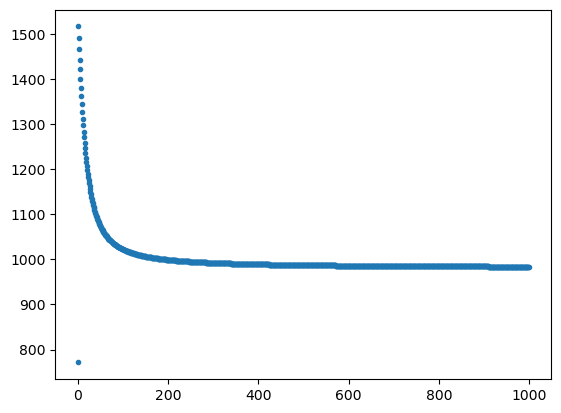

In [64]:
plt.plot(range(num_epochs), J_MSE, '.')

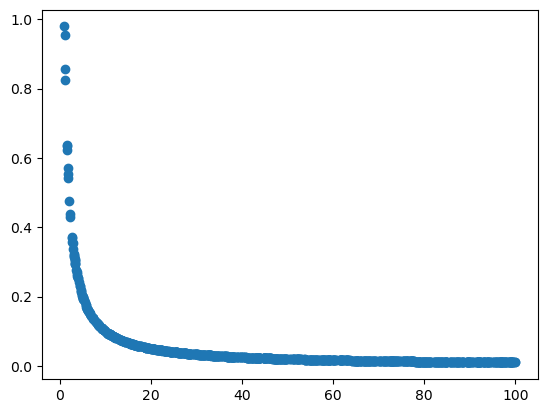

In [ ]:
plt.plot(x, y, 'o')

In [ ]:
np.zeros(2)


array([0., 0.])

In [31]:

W01_2

array([[0.02711584, 0.15071165, 0.10309987]])